In [82]:
import pandas as pd

# fetch data
data = pd.read_csv('Reddit_Post_Data.csv')
data.head()

,post_id,author,title,body,subreddit,upvotes,comments,post_time
0,post_0,author_28,Title 0,"Lorem ipsum dolor sit amet, consectetur adipis...",subreddit_18,104,11,2023-10-23 06:05:20
1,post_1,author_21,Title 1,"Lorem ipsum dolor sit amet, consectetur adipis...",subreddit_4,100,12,2023-03-24 14:38:27
2,post_2,author_38,Title 2,"Lorem ipsum dolor sit amet, consectetur adipis...",subreddit_17,106,11,2023-03-16 05:25:06
3,post_3,author_27,Title 3,"Lorem ipsum dolor sit amet, consectetur adipis...",subreddit_20,100,8,2023-02-05 22:45:15
4,post_4,author_61,Title 4,"Lorem ipsum dolor sit amet, consectetur adipis...",subreddit_16,137,9,2023-12-27 09:51:30


In [11]:
data.shape

(1000, 8)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    1000 non-null   object
 1   author     1000 non-null   object
 2   title      1000 non-null   object
 3   body       1000 non-null   object
 4   subreddit  1000 non-null   object
 5   upvotes    1000 non-null   int64 
 6   comments   1000 non-null   int64 
 7   post_time  1000 non-null   object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB


In [3]:
data.describe()

,upvotes,comments
count,1000.00000,1000.000000
mean,100.20300,10.072000
std,10.61784,3.218256
min,67.00000,1.000000
25%,93.00000,8.000000
50%,100.00000,10.000000
75%,107.00000,12.000000
max,137.00000,22.000000


In [4]:
# intital exploration
data.isna().sum()

post_id      0
author       0
title        0
body         0
subreddit    0
upvotes      0
comments     0
post_time    0
dtype: int64

In [16]:
data[data.duplicated()]

,body,upvotes,comments,post_time,post_length


<Axes: xlabel='upvotes', ylabel='Count'>

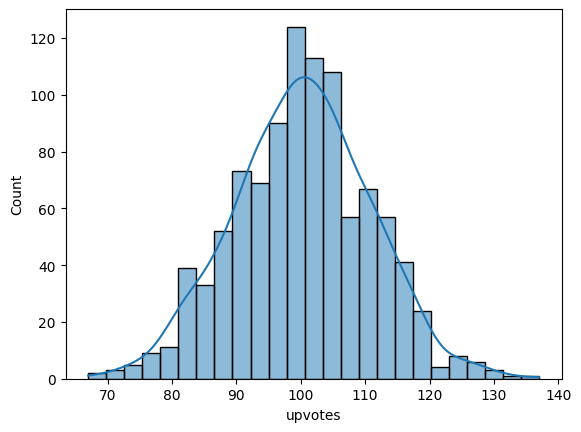

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualization on variables
sns.histplot(data['upvotes'], kde=True)

In [8]:
#skew of target
print(f"Skew of upvotes: {data['upvotes'].skew()}")

Skew of upvotes: -0.006918149482196264


Upvotes follows a Gaussian ditribution with negligible skew. No transformations required.

<Axes: xlabel='comments', ylabel='upvotes'>

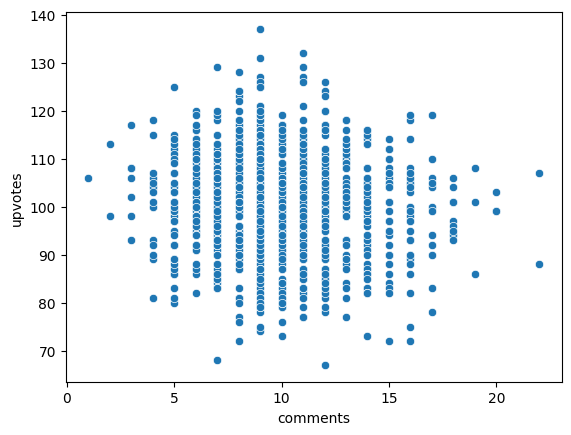

In [9]:
sns.scatterplot(data, x='comments', y='upvotes')

In [89]:
#check how the subreddit feature looks 
data['subreddit'].value_counts()

subreddit
subreddit_11    61
subreddit_1     60
subreddit_10    59
subreddit_6     57
subreddit_2     54
subreddit_17    53
subreddit_13    53
subreddit_9     52
subreddit_4     50
subreddit_15    50
subreddit_16    49
subreddit_18    48
subreddit_19    48
subreddit_20    47
subreddit_7     47
subreddit_3     46
subreddit_14    44
subreddit_8     44
subreddit_12    40
subreddit_5     38
Name: count, dtype: int64

In [95]:
data['subreddit'] = data['subreddit'].str.lstrip('subreddit_')

<Axes: xlabel='subreddit', ylabel='upvotes'>

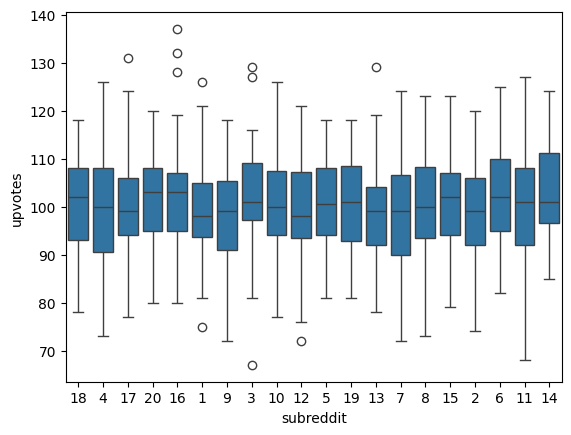

In [96]:
sns.boxplot(data, x='subreddit', y='upvotes')

In [83]:
data['author'].value_counts()

author
author_55    16
author_77    16
author_48    16
author_72    16
author_46    16
             ..
author_41     5
author_87     5
author_19     5
author_50     4
author_62     4
Name: count, Length: 100, dtype: int64

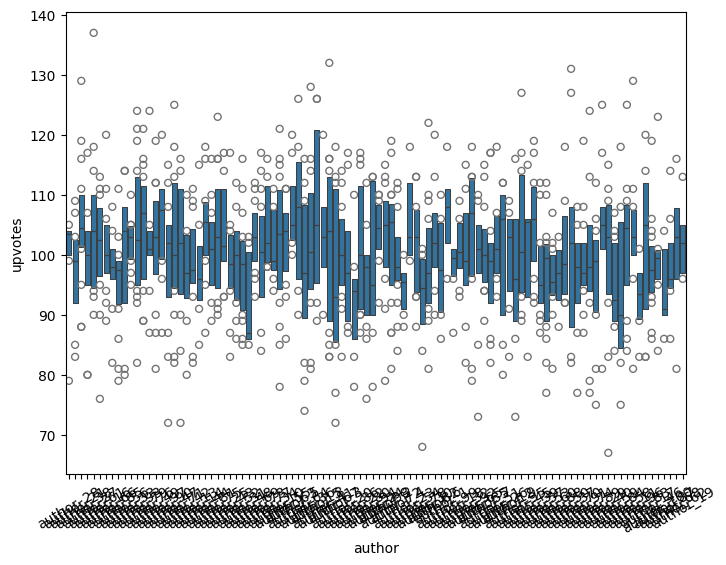

In [88]:
plt.figure(figsize=(8,6))
sns.boxenplot(data, x='author', y='upvotes')
plt.xticks(rotation=30)
plt.show()

In [76]:
# drop all unwanted features
data.drop(['post_id','author', 'title',	'subreddit', 'body'], inplace=True, axis=1)

In [13]:
data.columns

Index(['body', 'upvotes', 'comments', 'post_time'], dtype='object')

In [19]:
data['post_time']

0      2023-10-23 06:05:20
1      2023-03-24 14:38:27
2      2023-03-16 05:25:06
3      2023-02-05 22:45:15
4      2023-12-27 09:51:30
              ...         
995    2023-12-04 03:47:34
996    2023-09-09 23:58:06
997    2023-03-20 19:48:50
998    2023-11-25 13:27:18
999    2023-10-05 10:28:14
Name: post_time, Length: 1000, dtype: object

In [100]:
data['post_time'] = pd.to_datetime(data['post_time'])

In [101]:
from datetime import datetime
data['post_age'] = data['post_time'].apply(lambda x: (datetime.today().date() - x.date()).days)
data['post_age']

0      248
1      461
2      469
3      508
4      183
      ... 
995    206
996    292
997    465
998    215
999    266
Name: post_age, Length: 1000, dtype: int64

In [79]:
data.drop('post_time', inplace=True, axis=1)

<Axes: >

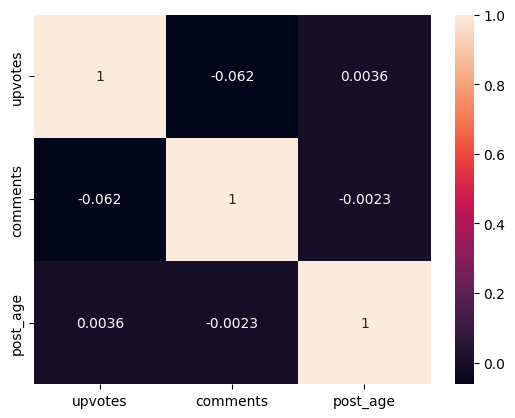

In [80]:
#plot correlation matrix
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='post_age', ylabel='upvotes'>

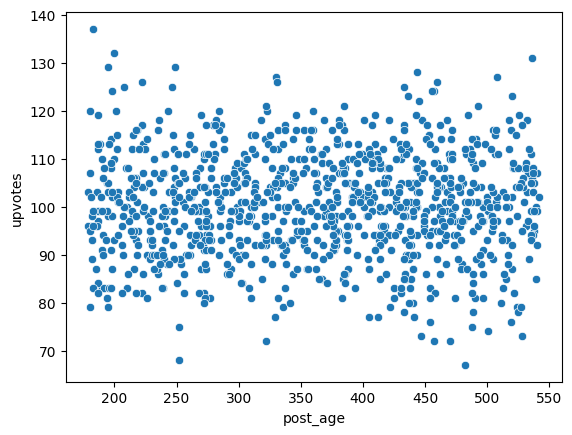

In [105]:
sns.scatterplot(data, x='post_age', y='upvotes')

In [103]:
data.head()

,post_id,author,title,body,subreddit,upvotes,comments,post_time,post_age
0,post_0,author_28,Title 0,"Lorem ipsum dolor sit amet, consectetur adipis...",18,104,11,2023-10-23 06:05:20,248
1,post_1,author_21,Title 1,"Lorem ipsum dolor sit amet, consectetur adipis...",4,100,12,2023-03-24 14:38:27,461
2,post_2,author_38,Title 2,"Lorem ipsum dolor sit amet, consectetur adipis...",17,106,11,2023-03-16 05:25:06,469
3,post_3,author_27,Title 3,"Lorem ipsum dolor sit amet, consectetur adipis...",20,100,8,2023-02-05 22:45:15,508
4,post_4,author_61,Title 4,"Lorem ipsum dolor sit amet, consectetur adipis...",16,137,9,2023-12-27 09:51:30,183


In [104]:
#split data
from sklearn.model_selection import train_test_split
X= data[['comments', 'post_age']]
y = data['upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
#evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def eval_metrics(test, pred):
    r2_score = metrics.r2_score(test, pred)
    mae = metrics.mean_absolute_error(test, pred)
    rmse = metrics.mean_squared_error(test, pred, squared=False)
    return r2_score, mae, rmse


def print_metrics(test, pred):
    r2_score, mae, rmse = eval_metrics(test, pred)
    print(f"r2_score : {r2_score}")
    print(f"MAE :{mae}")
    print(f"RMSE: {rmse}")


def cross_val(model, x, y):
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_root_mean_squared_error')
    return cv_scores.mean()

In [108]:
#modeling
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

print(f"CV RMSE for linear model is : {cross_val(linear_model, X_train, y_train)}")

linear_model.fit(X_train, y_train)

CV RMSE for linear model is : -10.717081215616275


LinearRegression()

In [113]:
linear_model.coef_

array([-0.2347467 , -0.00240407])

In [114]:
pd.DataFrame(linear_model.coef_, index=X.columns)

,0
comments,-0.234747
post_age,-0.002404


In [109]:
#predict on test data
y_pred = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted values')

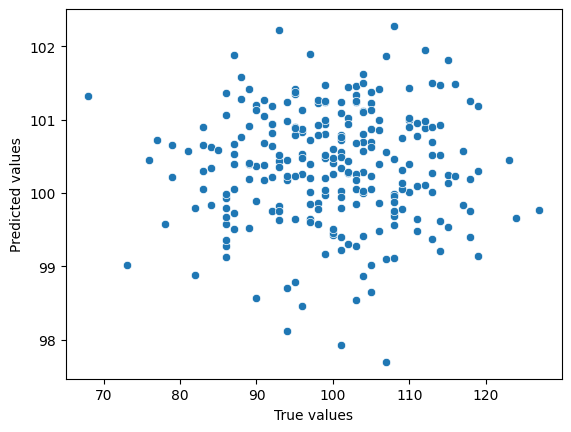

In [117]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True values')
plt.ylabel("Predicted values")

In [129]:
#predict on train data
y_pred_train = linear_model.predict(X_train)

print(f"Train dataset evaluation metrics")

print_metrics(y_train, y_pred_train)


print(f"\nTest dataset evaluation metrics")

print_metrics(y_test, y_pred)

Train dataset evaluation metrics
r2_score : 0.005520955817870488
MAE :8.4700137553747
RMSE: 10.696702911056166

Test dataset evaluation metrics
r2_score : -0.007716011154397906
MAE :8.261627800125328
RMSE: 10.292829009463361


In [131]:
results_df = pd.DataFrame(data=[['LinearRegression', *eval_metrics(y_test, y_pred), cross_val(linear_model, X_train, y_train)]], columns=['Model', 'R2', 'MAE', 'RMSE', 'CV'])

In [134]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(min_samples_leaf=3, max_depth=6)

print(f"CV RMSE: {cross_val(rf_model, X_train, y_train)}")

rf_model.fit(X_train, y_train)

CV RMSE: -11.024164002448815


RandomForestRegressor(max_depth=6, min_samples_leaf=3)

In [135]:
rf_model.feature_importances_

array([0.28251474, 0.71748526])

In [136]:
#train data prediction
y_pred_train = rf_model.predict(X_train)
# test data
y_pred = rf_model.predict(X_test)

In [137]:
print(f"Train dataset evaluation metrics")

print_metrics(y_train, y_pred_train)


print(f"\nTest dataset evaluation metrics")

print_metrics(y_test, y_pred)

Train dataset evaluation metrics
r2_score : 0.15991823692572305
MAE :7.791963857358718
RMSE: 9.831344044929864

Test dataset evaluation metrics
r2_score : -0.054934697319189985
MAE :8.445879189441701
RMSE: 10.531214703678897


In [140]:
results_rf = pd.DataFrame(data=[['RandomForest', *eval_metrics(y_test, y_pred), cross_val(rf_model, X_train, y_train)]], columns=['Model', 'R2', 'MAE', 'RMSE', 'CV'])

In [144]:
results_df = pd.concat([results_df, results_rf], ignore_index=True)

<Axes: xlabel='R2', ylabel='Model'>

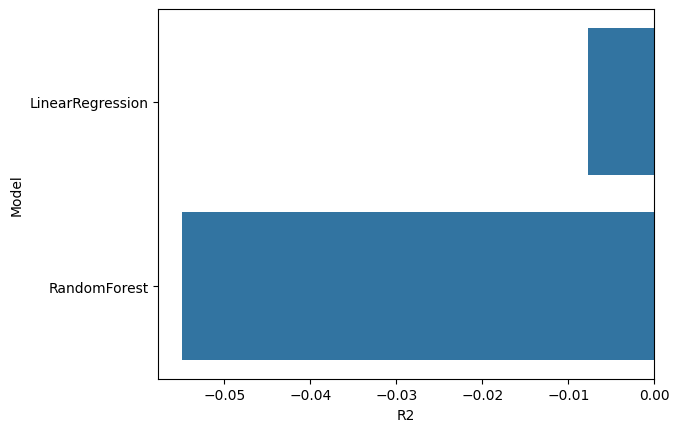

In [145]:
sns.barplot(results_df, x='R2', y='Model')